# 線形基底関数モデル

In [1]:
include("linear_regression.jl")
include("../functions/design_matrix.jl")
using .linear_regression
using .design_matrix

## 問題
$y = sin(2\pi x)$を回帰により求める。観測値$t$には$\mathcal{N}(0, 0.1^2)$に従うノイズが乗っている。

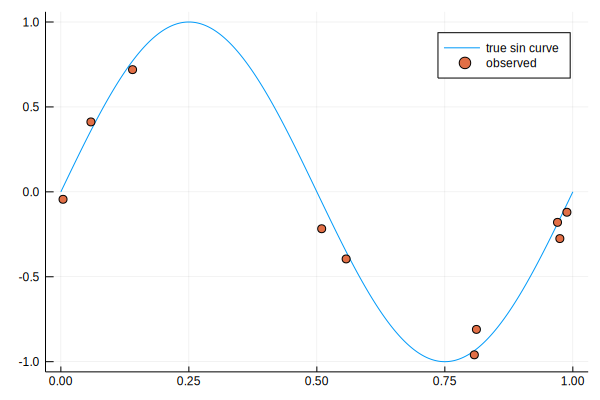

In [2]:
using Plots
using Random

Random.seed!(3)

N = 10
x = rand(N)
t = sin.(2*pi*x) .+ randn(N) .* 0.1

xline = collect(range(0,stop=1,length=1000))

plot(xline, sin.(2*pi.*xline), label="true sin curve")
scatter!(x, t, label="observed")

## 基底関数：多項式
$j = 0, \ldots, M$

$$
\phi_j (x) = x^j
$$

In [3]:
# ハイパーパラメータ
M = 10
λ = 1e-4


Φ = polynomial_design_matrix( x, M )
linear = LinearRegression()
fit( linear, Φ, t )

ridge  = RidgeRegression( λ )
fit( ridge, Φ, t );

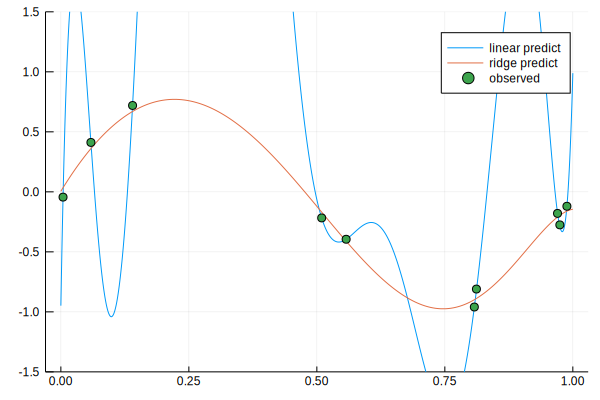

In [4]:
Φline = polynomial_design_matrix( xline, M )
linear_yline = predict( linear, Φline )
ridge_yline  = predict(  ridge, Φline )

plot(xline, linear_yline, label="linear predict")
plot!(xline, ridge_yline, label="ridge predict")
ylims!(-1.5, 1.5)
scatter!(x, t, label="observed")

## 基底関数：ガウス関数
$j = 0, \ldots, M$

$\mu_j = {j \over M}, s = $適当に調整

$$
\phi_j (x) = \exp \left\{ - \frac{ (x - \mu_j)^2 }{ 2s^2 } \right\}
$$



In [5]:
# ハイパーパラメータ
M = 10
λ = 1e-4
μ_range = [0 1]
s = 0.3


Φ = gauss_design_matrix( x, M, μ_range, s )
linear = LinearRegression()
fit( linear, Φ, t )

ridge  = RidgeRegression( λ )
fit( ridge, Φ, t );

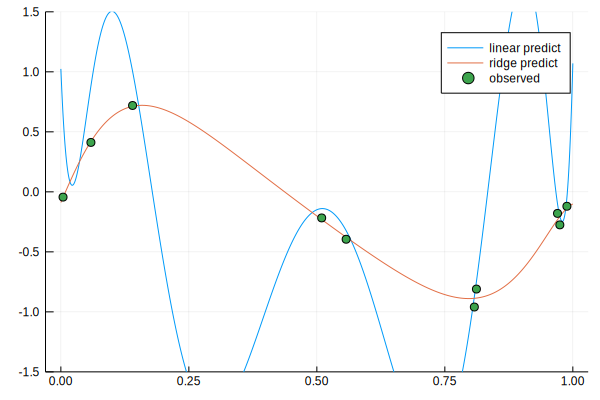

In [6]:
Φline = gauss_design_matrix( xline, M, μ_range, s )
linear_yline = predict( linear, Φline )
ridge_yline  = predict(  ridge, Φline )

plot(xline, linear_yline, label="linear predict")
plot!(xline, ridge_yline, label="ridge predict")
ylims!(-1.5, 1.5)
scatter!(x, t, label="observed")